In [ ]:
### Check which GPU is in use

!nvidia-smi

Thu Nov  5 12:06:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 42kB/s 


In [ ]:
### Installing tensorflow and checking the version

import tensorflow as tf
print(tf.__version__)

2.3.1


In [ ]:
### Importing all necessaries libraries

from tensorflow.keras.layers import Dense,Flatten,Input,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from glob import glob

In [ ]:
### Resizing all images

IMAGE_SIZE=[224,224]

### Read the data from the drive

train_path='/content/drive/My Drive/Datasets/Cotton Disease/train'
test_path='/content/drive/My Drive/Datasets/Cotton Disease/test'

In [ ]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
  layer.trainable=False

In [ ]:
folders=glob('/content/drive/My Drive/Datasets/Cotton Disease/train/*')

In [ ]:
folders

['/content/drive/My Drive/Datasets/Cotton Disease/train/diseased cotton plant',
 '/content/drive/My Drive/Datasets/Cotton Disease/train/fresh cotton leaf',
 '/content/drive/My Drive/Datasets/Cotton Disease/train/fresh cotton plant',
 '/content/drive/My Drive/Datasets/Cotton Disease/train/diseased cotton leaf']

In [ ]:
x=Flatten()(vgg16.output)

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)

In [ ]:
model=Model(inputs=vgg16.input,outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True
                                  )
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Cotton Disease/train',
                                               target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Cotton Disease/test',
                                               target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

Found 348 images belonging to 4 classes.


In [ ]:
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
122/122 [==============================] - 1167s 10s/step - loss: 0.5440 - accuracy: 0.7863 - val_loss: 0.2216 - val_accuracy: 0.9052
Epoch 2/20
122/122 [==============================] - 39s 319ms/step - loss: 0.2200 - accuracy: 0.9159 - val_loss: 0.1935 - val_accuracy: 0.9282
Epoch 3/20
122/122 [==============================] - 39s 318ms/step - loss: 0.1793 - accuracy: 0.9339 - val_loss: 0.2864 - val_accuracy: 0.8966
Epoch 4/20
122/122 [==============================] - 40s 325ms/step - loss: 0.1767 - accuracy: 0.9272 - val_loss: 0.2862 - val_accuracy: 0.9023
Epoch 5/20
122/122 [==============================] - 39s 323ms/step - loss: 0.1096 - accuracy: 0.9600 - val_loss: 0.2108 - val_accuracy: 0.9310
Epoch 6/20
122/122 [==============================] - 39s 322ms/step - loss: 0.0899 - accuracy: 0.9703 - val_loss: 0.1546 - val_accuracy: 0.9454
Epoch 7/20
122/122 [==============================] - 

In [ ]:
import matplotlib.pyplot as plt

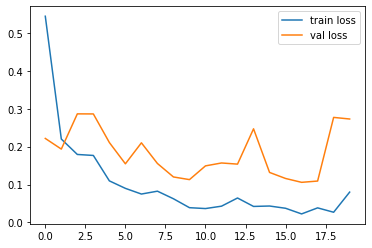

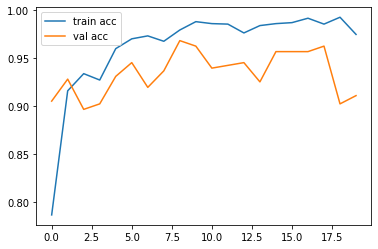

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
### Saving the model into a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')